<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SAMPLES  512 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


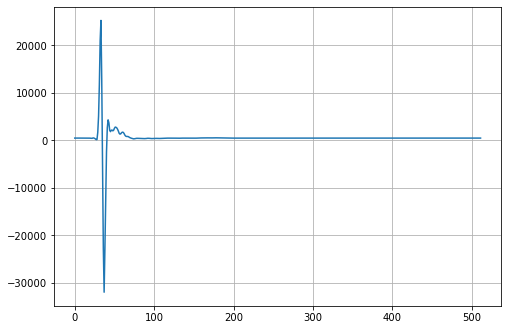

In [314]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

#Increase size of ploy in jupyter
plt.rcParams["figure.figsize"] = (8,5.5)

if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    from scipy.fft import fft, fftfreq, ifft
    
    #read *.txt file
    data = pd.read_csv("A_SCOPE_GPR.txt", sep = "\t", names=['SAMPLES'],engine='python', encoding = "cp949")
    data.info()
     
    plt.plot(data)
    plt.grid()

0      496.0
1      501.0
2      494.0
3      502.0
4      495.0
       ...  
507    498.0
508    495.0
509    493.0
510    497.0
511    497.0
Name: SAMPLES, Length: 512, dtype: float64


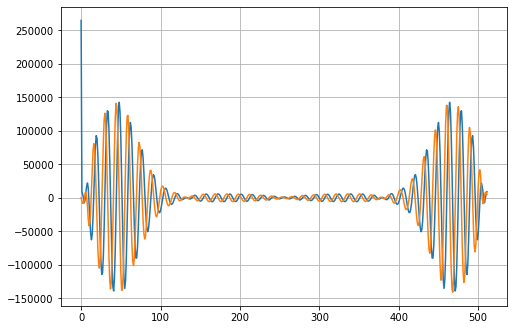

In [315]:
#Increase size of ploy in jupyter
plt.rcParams["figure.figsize"] = (8,5.5)

#data2 = np.c_[data['SAMPLES']]
data2 = pd.DataFrame(data)

samples = data2.size           #sample rate

data2.loc[:,1] = 0
data2
print(data2["SAMPLES"])
t = np.arange(1, samples,1)
#plt.plot(data2)
y=fft(data2["SAMPLES"].values)

plt.plot(y.real)     # fft_real
plt.plot(y.imag)     # fft_real
plt.grid()


[  0.         -28.12680172 -28.87982692 -30.15362531 -30.19674767
 -30.62621529 -26.72951304 -23.63559808 -20.36854707 -17.48030209]

[-28.12680172 -28.87982692 -30.15362531 -30.19674767 -30.62621529
 -26.72951304 -23.63559808 -20.36854707 -17.48030209 -15.89584829]


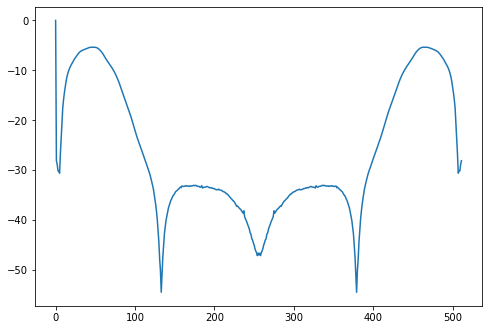

In [558]:
#Increase size of ploy in jupyter
plt.rcParams["figure.figsize"] = (8,5.5)

y_mag = np.abs(y)

#print(max(y_mag))
dB = 10*np.log10( (y_mag)**2 / max(y_mag)**2 ) #decibel
 
plt.plot(dB)
#print(dB)

print(dB[0:10])
print("")
print(np.flipud(dB[samples-10:samples]))

In [223]:
#fft test
#test_r = y.real
#test_i = y.imag
#test = fft(test_r)
#plt.plot(test.real)

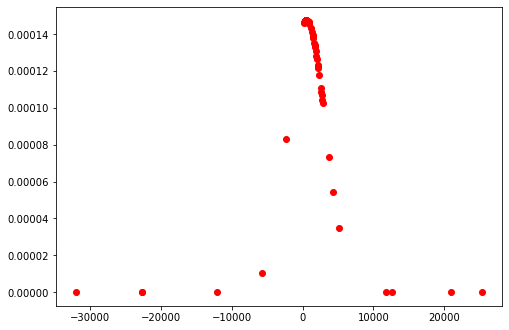

In [317]:
#probability density function
#referred to the page 253 from GPR, IEE
from scipy.stats import norm
data3= data2["SAMPLES"]
m = np.mean(data3)
sd = np.std(data3)

data3_pdf = norm.pdf(data3,m,sd)
#print(data3_pdf)
plt.plot(data3,data3_pdf,"ro")


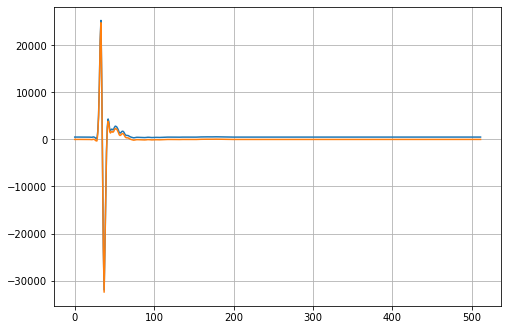

In [318]:
#Increase size of ploy in jupyter
plt.rcParams["figure.figsize"] = (8,5.5)

data4 = data3 - np.mean(data3[400:500])
np.mean(data3[300:500])
plt.plot(data3)
plt.plot(data4)
plt.grid()

33
33


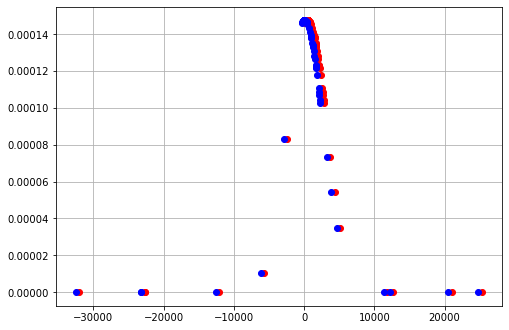

In [319]:
#Increase size of ploy in jupyter
plt.rcParams["figure.figsize"] = (8,5.5)

m2 = np.mean(data4)
sd2 = np.std(data4)
data4_pdf = norm.pdf(data4,m2,sd2)
#data4_pdf = norm.pdf(data4,0,2)

#print(data3_pdf)
plt.plot(data3,data3_pdf,'ro')              #before remove DC_offset
plt.plot(data4,data4_pdf,'bo')              #after remote DC_offset
plt.grid()
print(np.argmax(data3))
print(np.argmax(data4))

#no critical change before and after DC_offset

In [310]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

[[0.08386514]
 [0.07746372]
 [0.0715568 ]
 [0.06610646]
 [0.0610775 ]
 [0.05643733]
 [0.05215574]
 [0.04820485]
 [0.04455888]
 [0.04119402]
 [0.03808834]]


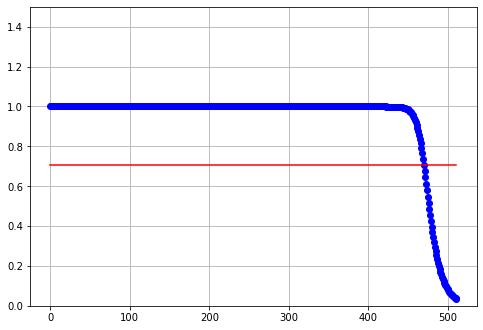

In [671]:
#fr = range(1,100,1)
f_c = 470
k = 40
H = np.zeros(shape=(samples,1))
f_3dB = np.zeros(shape=(samples,1))


for f in range(0,samples,1):
    H[f] = np.sqrt(1.0/(1.0+( (f/f_c)**(2*k)) ))
    f_3dB[f] = 1/np.sqrt(2.0)

    
#plt.plot(H[500:511],"bo")
#plt.plot(f_3dB[500:511],"r-")
plt.plot(H,"bo")
plt.plot(f_3dB, "r-")
plt.ylim([0.0,1.5])
plt.grid()
print (H[500:511])

[[0.03522157]
 [0.03808834]
 [0.04119402]
 [0.04455888]
 [0.04820485]
 [0.05215574]
 [0.05643733]
 [0.0610775 ]
 [0.06610646]
 [0.0715568 ]
 [0.07746372]
 [0.08386514]
 [0.09080185]
 [0.09831762]
 [0.10645931]
 [0.1152769 ]
 [0.12482351]
 [0.1351553 ]
 [0.14633132]
 [0.15841322]
 [0.17146471]
 [0.18555095]
 [0.20073759]
 [0.21708947]
 [0.23466904]
 [0.25353423]
 [0.2737359 ]
 [0.29531472]
 [0.31829751]
 [0.34269303]
 [0.36848742]
 [0.39563938]
 [0.42407541]
 [0.45368562]
 [0.48432057]
 [0.51578973]
 [0.54786233]
 [0.58027105]
 [0.61271881]
 [0.6448888 ]
 [0.67645704]
 [0.70710678]
 [0.73654311]
 [0.76450658]
 [0.79078419]
 [0.81521681]
 [0.83770245]
 [0.85819528]
 [0.87670123]
 [0.89327086]
 [0.90799066]
 [0.92097381]
 [0.93235132]
 [0.94226402]
 [0.95085588]
 [0.95826877]
 [0.96463858]
 [0.97009256]
 [0.97474773]
 [0.97871017]
 [0.98207481]
 [0.98492577]
 [0.98733696]
 [0.98937286]
 [0.99108938]
 [0.99253473]
 [0.99375034]
 [0.99477167]
 [0.99562896]
 [0.99634793]
 [0.99695043]
 [0.99

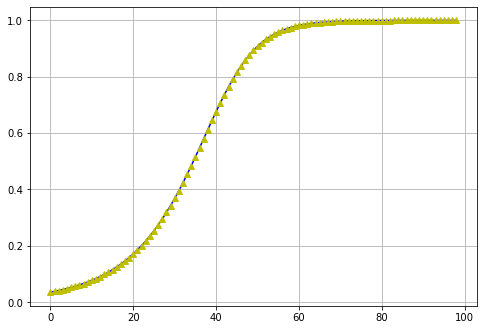

In [707]:
H = np.zeros(shape=(samples,1))
H2 = np.zeros(shape=(samples,1))

for f in range(0,samples,1):
#    H[f] = 1.0/ (np.sqrt(1.0/(1.0+( (f/f_c)**(2*k)) )))-1
    H[f] = np.sqrt(1.0/(1.0+( (f/f_c)**(2*k)) ))
    f_3dB[f] = 1/np.sqrt(2.0)
    
H2 = np.flipud(H)

#H3 = (H+H2)/2.0
H3 = (H+H2)-1

#plt.plot(H,"go")
#plt.plot(H2,"bo")
#s = 1
#e = 6
s = 470
e = 511

#plt.plot(H3[s:e],"bo")                                     #right-side high-pass filter
plt.plot(H3[0:99],"b")                          #left-side  high-pass filter
plt.plot(np.flipud(H3[413:512]),"y^")                          #left-side  high-pass filter

#print (H3[0:99],np.flipud(H3[409:512]))

#plt.plot(H,"bo")
#plt.plot(f_3dB, "r-")
#plt.ylim([0.0,1.5])
plt.grid()


#check the both side of the filter
print (H3[0:5])
print ("")
print (np.flipud(H3[506:511]))

[-22.75651418 -23.50953937 -24.78333776 -24.82646012 -25.25592774]

[-23.50953937 -24.78333776 -24.82646012 -25.25592774 -21.35922549]


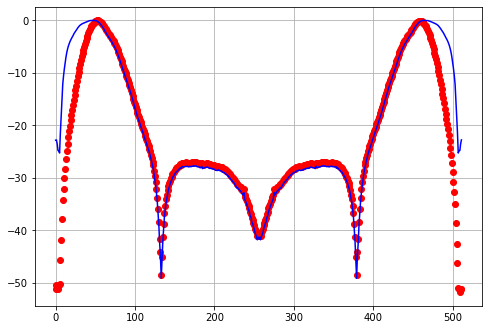

In [673]:
hpf = np.zeros(shape=(samples,1))

y2 = np.fft.fft(data4)
y2_mag = np.abs(y2)

dB2 = 10*np.log10( (y2_mag)**2 / max(y2_mag)**2 ) #decibel
#y_mag[0] = y_mag[samples-1]                #correct strange error in the dB graph at the y_mag[0]
    
for f in range(0,samples,1):
    hpf[f] = H3[f] * y2_mag[f]
#    hpf[f] =  y_mag[f] / H[f]

dB3 = 10*np.log10( (hpf)**2 / max(hpf)**2 ) #decibel

#plt.plot(dB2[100:400],"ro")
#plt.plot(dB[100:400],"b")
plt.plot(dB3,"ro")
plt.plot(dB2,"b")

plt.grid()
print (dB2[1:6])
print ("")
print (np.flipud(dB2[506:511]))


In [636]:
hpf2_real = np.zeros(shape=(samples,1))
hpf2_imag = np.zeros(shape=(samples,1))
y2 = np.zeros(shape=(samples,1))

for f in range(0,samples,1):
    hpf2_real[f] = H3[f] * y.real[f]
    hpf2_imag[f] = H3[f] * y.imag[f]
    
#plt.plot(hpf2_real, 'b')
#plt.plot(hpf2_imag, 'r')

#y2 = np.fft.ifft(hpf2_real)
#plt.plot(y2.real)
#y2 = np.fft.ifft(hpf2_real[:],hpf2_imag[:])
#print(hpf2_real[:])
#print(hpf2_imag[1])
#plt.plot(y.real)
#plt.plot(hpf2_real)
#plt.grid()
#plt.plot(hpf2_imag) 

y2 = np.fft.ifft(hpf2_real[1],hpf2_imag[f])
plt.plot(y2.real)


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
#tw = 295.894257 * 10**(-9)   #time window
#fs = samples                 #sample rate                 
#nyq = 0.5 * fs *256          #nyquest frequency
                             #frequency interval
#print(tw)
#print (fs)
#print (nyq)
#lowcut = 500.0
#highcut = 1250.0

#lowcut = 30*10**6
#highcut = 110*10**6

#for order in [1, 5, 10]:
#        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#        w, h = freqz(b, a, fs=fs, worN=2000)
#        plt.plot(w, abs(h), label="order = %d" % order)
        
#plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
#           '--', label='sqrt(0.5)')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Gain')
#plt.grid(True)
#plt.legend(loc='best')

#y = butter_bandpass_filter(data,lowcut, highcut, fs, order=6)
#plt.plot(y)
#plt.grid()
#plt.clf()